# алгоритм Нидлмана-Вунша

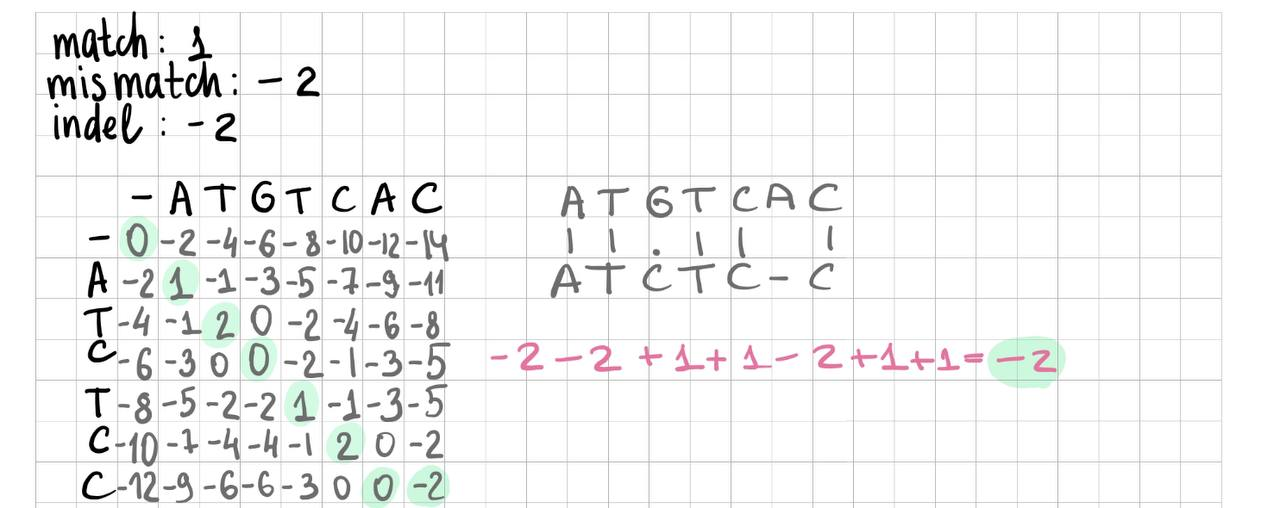

In [24]:
def needleman_wunsch(seq1, seq2, match, mismatch, indel):
    n = len(seq1)
    m = len(seq2)
    
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(n + 1):
        dp[i][0] = gap * i
    for j in range(m + 1):
        dp[0][j] = gap * j

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            dp[i][j] = max(dp[i - 1][j - 1] + score, dp[i - 1][j] + indel, dp[i][j - 1] + indel)
    
    align1, align2 = "", ""
    i, j = n, m
    while i > 0 or j > 0:
        if i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + indel:
            align1 = seq1[i - 1] + align1
            align2 = "-" + align2
            i -= 1
        else:
            align1 = "-" + align1
            align2 = seq2[j - 1] + align2
            j -= 1
    

    score = dp[n][m]
    
    return dp, align1, align2, score



In [ ]:
seq1 = "ATCTCC"
seq2 = "ATGTCAС"
match = 1
mismatch = -2
gap = -2

In [26]:
dp, align1, align2, score = needleman_wunsch(seq1, seq2, match, mismatch, gap)
print("матрица выравнивания:")
for row in dp:
    print(row)
print("\nвыравнивание:")
print(align1)
print(align2)
print("\nбаллы:", score)

матрица выравнивания:
[0, -2, -4, -6, -8, -10, -12, -14]
[-2, 1, -1, -3, -5, -7, -9, -11]
[-4, -1, 2, 0, -2, -4, -6, -8]
[-6, -3, 0, 0, -2, -1, -3, -5]
[-8, -5, -2, -2, 1, -1, -3, -5]
[-10, -7, -4, -4, -1, 2, 0, -2]
[-12, -9, -6, -6, -3, 0, 0, -2]

выравнивание:
ATCTC-C
ATGTCAС

баллы: -2


In [28]:
seq1 = "GCATGCU"
seq2 = "GATTACA"
match = 1
mismatch = -2
gap = -2

In [29]:
dp, align1, align2, score = needleman_wunsch(seq1, seq2, match, mismatch, gap)
print("матрица выравнивания:")
for row in dp:
    print(row)
print("\nвыравнивание:")
print(align1)
print(align2)
print("\nбаллы:", score)

матрица выравнивания:
[0, -2, -4, -6, -8, -10, -12, -14]
[-2, 1, -1, -3, -5, -7, -9, -11]
[-4, -1, -1, -3, -5, -7, -6, -8]
[-6, -3, 0, -2, -4, -4, -6, -5]
[-8, -5, -2, 1, -1, -3, -5, -7]
[-10, -7, -4, -1, -1, -3, -5, -7]
[-12, -9, -6, -3, -3, -3, -2, -4]
[-14, -11, -8, -5, -5, -5, -4, -4]

выравнивание:
GCA-TGCU
G-ATTACA

баллы: -4


# алгоритм Смита-Вотермана

In [2]:
def smith_waterman(seq1, seq2, match, mismatch, indel):
    n = len(seq1)
    m = len(seq2)
 
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    max_score = 0
    max_pos = (0, 0) 

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            score = match if seq1[i - 1] == seq2[j - 1] else mismatch
        
            dp[i][j] = max(0, dp[i - 1][j - 1] + score, dp[i - 1][j] + indel,dp[i][j - 1] + indel)
            
            if dp[i][j] > max_score:
                max_score = dp[i][j]
                max_pos = (i, j)
    

    align1, align2 = "", ""
    i, j = max_pos  

    while i > 0 and j > 0 and dp[i][j] > 0:
        if dp[i][j] == dp[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i - 1][j] + indel:
            align1 = seq1[i - 1] + align1
            align2 = "-" + align2
            i -= 1
        else:
            align1 = "-" + align1
            align2 = seq2[j - 1] + align2
            j -= 1
    
    score = max_score
    
    return dp, align1, align2, score

seq1 = "ATCTCC"
seq2 = "ATGTCAС"

dp, align1, align2, score = smith_waterman(seq1, seq2, match=1, mismatch=-2, indel=-2)

print("матрица:")
for row in dp:
    print(row)
print("\nвыравнивание:")
print(align1)
print(align2)
print(f"балл: {score}")

матрица:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 2, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]

выравнивание:
AT
AT
балл: 2


In [3]:
seq1 = "GATTACA"
seq2 = "GCATGCU"
dp, align1, align2, score = smith_waterman(seq1, seq2, match=2, mismatch=-1, indel=-1)

print("матрица:")
for row in dp:
    print(row)
print("\nвыравнивание:")
print(align1)
print(align2)
print(f"балл: {score}")

матрица:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 0, 0, 2, 1, 0]
[0, 1, 1, 3, 2, 1, 1, 0]
[0, 0, 0, 2, 5, 4, 3, 2]
[0, 0, 0, 1, 4, 4, 3, 2]
[0, 0, 0, 2, 3, 3, 3, 2]
[0, 0, 2, 1, 2, 2, 5, 4]
[0, 0, 1, 4, 3, 2, 4, 4]

выравнивание:
G-AT
GCAT
балл: 5


# встроенная реализация

с ней возникли проблемы, почему-то в самом ноутбуке она либо не запускалась, либо был неправильный ответ

In [5]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from Bio import pairwise2
def global_alignment(seq1 = "ATCTCC", seq2 = "ATGTCAС", match_score=1, mismatch_score=-2, gap_open=-2, gap_extend=0):
    alignments = pairwise2.align.globalms(seq1, seq2, match_score, mismatch_score, gap_open, gap_extend)
    return alignments

alignments = global_alignment()
for alignment in alignments:
    print (f"seq1={alignment[0]}, seq2={alignment[1]}, скор={alignment[2]}, start={alignment[3]}, end={alignment[4]}") 
    print(pairwise2.format_alignment(*alignment))

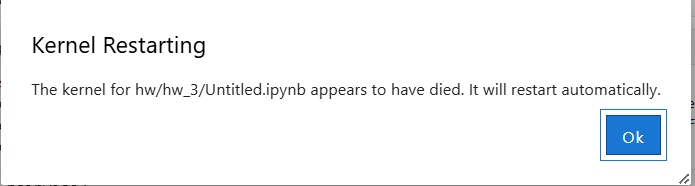

но зато почему-то запустилось с командной строки и ответ был таким же!

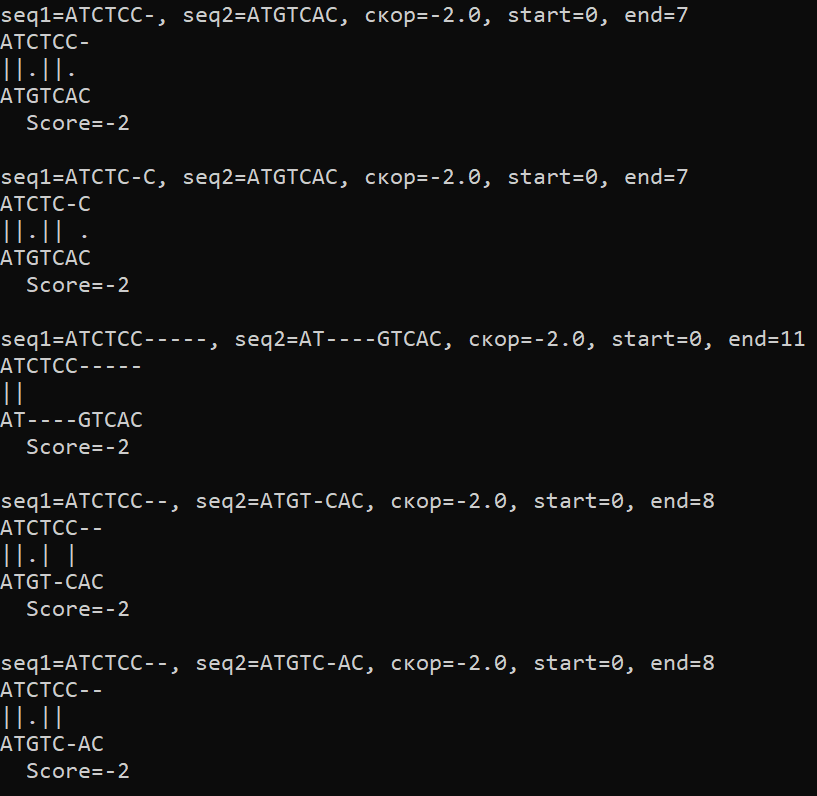